# PTM Biological Replicates
We see systematic differences in PTM ratios in the cell lines (see the first figure below). The systematic differences in PTM distributions can be caused by a number of factors:
* 'interesting' differences in the biology of the cell lines
* 'uninteresting' differences in the incorporation of tags in the cell lines 
* 'uninteresting' differences in the population of the cell lines 
Generally, we expect biological signals to be non-systematic and non-directional - e.g. if we measure enough things the half will probably go up and half will go down canceling out any systematic directional change. 

Out of the 45 cancer cell lines measurements in the PTM data, three measurements are of duplicate cell lines (run in different plexes):
* H1437 (measured in plexes 8 and 9)
* H209 (measured in plexes 1 and 9)
* H2073 (measured in plexes 6 and 9)

These biological replicates can be used to investigate the systematic differences we observe. For instance we expect that if the systematic differences are 'interesting' differences in the biology of the cell lines then we would expect repeated measurements of the same cell line (biological replicates) to show the same systematic difference. If biological replicates do not show the same systematic difference then we expect that the systematic difference is not biological in nature and is more likely caused by some 'uninteresting' differences in tag-incorporation or cell number. 

In [59]:
# imports and plotting defaults
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib
matplotlib.style.use('ggplot')
from copy import deepcopy

# use clustergrammer module to load/process (source code in clustergrammer directory)
from clustergrammer import Network

In [60]:
def plot_cl_boxplot_with_missing_data(inst_df, ylim=5):
    '''
    Make a box plot of the cell lines where the cell lines are ranked based 
    on their average PTM levels
    '''
    print(inst_df.shape)
    # get the order of the cell lines based on their mean 
    sorter = inst_df.mean().sort_values().index.tolist()
    # reorder based on ascending mean values
    sort_df = inst_df[sorter]
    # box plot of PTM values ordered based on increasing mean 
    sort_df.plot(kind='box', figsize=(10,5), rot=90, ylim=(-ylim, ylim))

## Systematic Differences are not Reproducible Under Biological Repeats
Below is a box plot of the 8,468 unique PTM measurements in all 45 measurements (note that each cell line has at most ~4000 measurements), where the rows (PTMs) have been Z-scored. 

In [61]:
filename = '../lung_cellline_3_1_16/lung_cl_all_ptm/all_ptm_ratios.tsv'
net = deepcopy(Network())
net.load_file(filename)
net.normalize(axis='row', norm_type='zscore')
tmp_df = net.dat_to_df()
inst_df = tmp_df['mat']

(8468, 45)


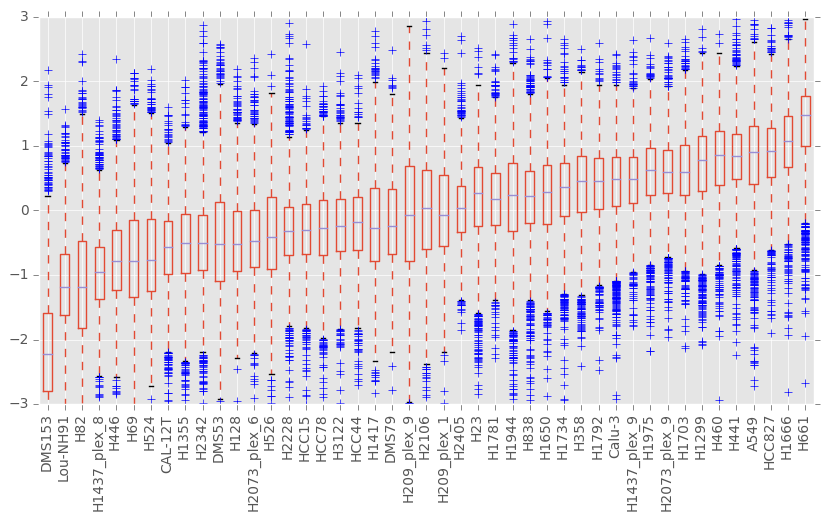

In [62]:
plot_cl_boxplot_with_missing_data(inst_df, 3)

We see that there is a considerable difference in the distributions of PTM ratios in these cell lines. PTM ratios in DMS153 are on average 2 standard deviations below the average value in all cell lines and PTM ratios in H661 are almost 2 standard deviations above. 

We can also see that the three biological replicate cell lines: H1437, H2073, and H209. If the systematic differences were biological in nature we would expect that the biological replicates would show a similar systematic difference. However, we see that for cell lines H1437 and H2073 we have one measurement with systematically low ratios and one measurement with systematically high ratios (the cell line H209 has similar ratios). This leads us to believe that the systematic differences are not biological in nature since they are not reproducible in biological repeats. 

We could argue that we can not safely reach any conclusions using this dataset since it contains a significant amount of missing data. To address this concern, we will repeat the same procedure using only PTMs that are measured in all cell lines (e.g. have no missing values) below. 

In [63]:
filename = '../lung_cellline_3_1_16/lung_cl_all_ptm/all_ptm_ratios.tsv'
net = deepcopy(Network())
net.load_file(filename)
net.filter_threshold('row', threshold=0, num_occur=45)
net.normalize(axis='row', norm_type='zscore')
tmp_df = net.dat_to_df()
inst_df = tmp_df['mat']

(865, 45)


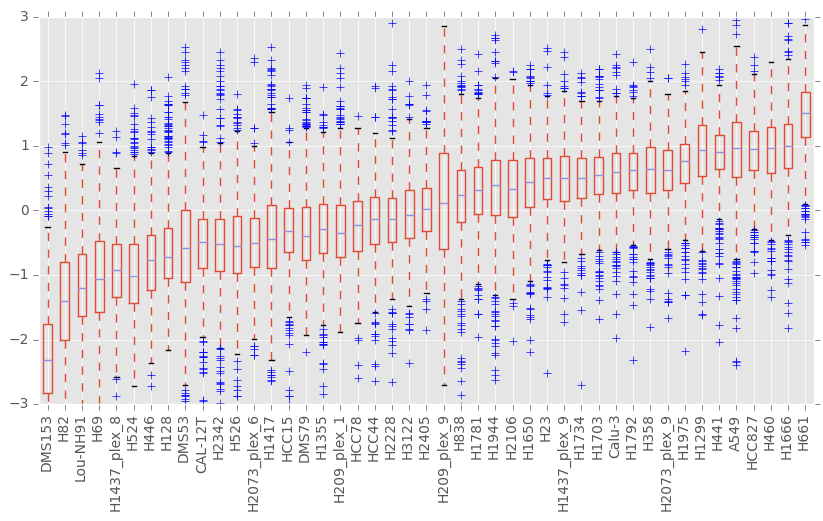

In [64]:
plot_cl_boxplot_with_missing_data(inst_df, 3)

In the above figure we have only considered PTMs that were measured in all 45 cell-line measurements. We still observe large differences in the average values of biological replicates, which again leads us to concluded that the systematic differences are not likely to be biological in nature. 

## Biological Repeat Distances 
Above we argued that systematic differences in the average distribution of PTM ratios are not likely caused by 'interesting' biological differences between cell lines because these systematic differences were not reproducible under biological repeat. Based on this, we should normalize the distributions to remove this systematic difference or bias in the cell lines. 

We can use the biological repeats to investigate the effect of normalization techniques. We expect that the distances (e.g. euclidean distance in PTM space) of identical cell lines will be lower than the average distances all cell lines. We also expect that a good normalization will reduce the distance between identical cell lines. 